In [1]:
%load_ext autoreload
%autoreload 2

In [35]:
from modules.my_pyspark import *
from modules.my_drawer import MyDrawer
from pyspark.sql import functions as F

In [18]:
drawer = MyDrawer()

In [3]:
spark = MyPySpark(session=True, sql=True)

In [4]:
spark.context

<SparkContext master=local appName=pyspark-shell>

#### Task 1

In [5]:
fifa_file_path = r'data/Fifa2018_dataset.csv'

In [6]:
fifa_df = spark.readFile(fifa_file_path, 'csv')

#### Task 2

_In Schema_

In [7]:
fifa_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


_Hiển thị hai dòng đầu của dư liệu_

In [8]:
fifa_df.toPandas().iloc[:2, :]

,_c0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0


_Cho biết dữ liệu có bao nhiêu dòng_

In [9]:
fifa_df.count()

17981

#### Task 3

In [10]:
fifa_df.createOrReplaceTempView('fifa_table')

#### Task 4

In [11]:
query_0 = '''
    select fft.Age
    from fifa_table as fft
    where fft.Nationality == "Germany"
'''

In [12]:
fifa_germany_age = spark.sqlQuery(query_0)

_Lấy 3 dòng đầu của dữ liệu_

In [13]:
fifa_germany_age.show(3)

+---+
|Age|
+---+
| 31|
| 27|
| 28|
+---+
only showing top 3 rows



_In thống kê dữ liệu_

In [15]:
fifa_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293756|
|    min|               16|
|    max|               36|
+-------+-----------------+



#### Task 5

_Trực quan hóa_

In [21]:
fifa_germany_age_ser = fifa_germany_age.toPandas()['Age']

In [22]:
fifa_germany_age_ser.head()

0    31
1    27
2    28
3    28
4    28
Name: Age, dtype: int32

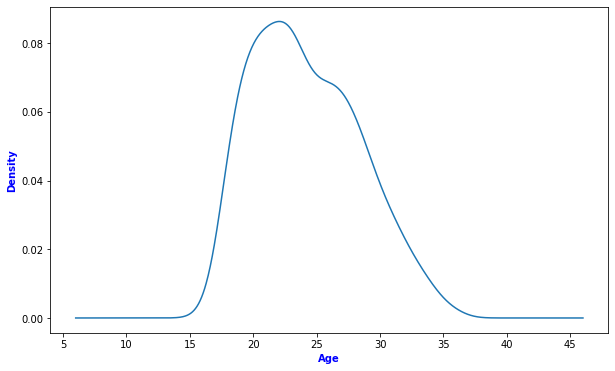

In [29]:
drawer.line(fifa_germany_age_ser, kind='density', figsize=(10, 6))

> **Nhận xét**
> * Biểu đồ có phân phối hơi lệch trái, có thể dùng log-normal để chuẩn lại cho thành phân phối chuẩn.

#### Task 6

_Mỗi độ tuổi có bao nhiêu cầu thủ_

In [30]:
fifa_df.groupBy('Age').count().show()

+---+-----+
|Age|count|
+---+-----+
| 31|  671|
| 34|  272|
| 28| 1051|
| 26| 1202|
| 27| 1152|
| 44|    2|
| 22| 1324|
| 47|    1|
| 16|   13|
| 20| 1245|
| 40|    8|
| 19| 1069|
| 41|    3|
| 43|    2|
| 37|   69|
| 17|  258|
| 35|  191|
| 39|   20|
| 23| 1394|
| 38|   36|
+---+-----+
only showing top 20 rows



_Độ tuổi trung bình của cầu thủ tại mỗi quốc gia_

In [31]:
fifa_df.groupBy('Nationality').avg('Age').show()

+--------------+------------------+
|   Nationality|          avg(Age)|
+--------------+------------------+
|          Chad|              25.0|
|        Russia| 25.23202614379085|
|      Paraguay| 26.10144927536232|
|       Senegal|25.046511627906977|
|        Sweden|25.119565217391305|
|        Guyana|              28.0|
|       Eritrea|              32.0|
|   Philippines|25.666666666666668|
|          Fiji|              29.0|
|        Turkey|25.127147766323024|
|          Iraq|              26.0|
|       Germany| 24.20263157894737|
|St Kitts Nevis|26.666666666666668|
|       Comoros| 27.11111111111111|
|   Afghanistan|              22.0|
|   Ivory Coast| 24.10891089108911|
|         Sudan|              22.5|
|        France|24.634969325153374|
|        Greece|24.418367346938776|
|        Kosovo|           23.9375|
+--------------+------------------+
only showing top 20 rows



#### Task 7

In [36]:
fifa_df.groupBy('Nationality').agg(F.min('Age'), F.max('Age'), F.min('Strength'), F.max('Strength')).show()

+--------------+--------+--------+-------------+-------------+
|   Nationality|min(Age)|max(Age)|min(Strength)|max(Strength)|
+--------------+--------+--------+-------------+-------------+
|          Chad|      24|      26|           73|           79|
|      Paraguay|      18|      37|           33|           91|
|        Russia|      17|      37|           26|           93|
|       Senegal|      18|      34|           37|           94|
|        Sweden|      17|      37|           21|           91|
|        Guyana|      25|      34|           47|           75|
|       Eritrea|      32|      32|           85|           85|
|   Philippines|      22|      28|           42|           76|
|          Fiji|      29|      29|           57|           57|
|        Turkey|      17|      39|           30|           90|
|          Iraq|      21|      30|           55|           86|
|       Germany|      16|      36|           28|           94|
|St Kitts Nevis|      23|      32|           32|       

#### Task 8

_Theo dataframe_

In [37]:
fifa_df.select('Club').distinct().show()

+--------------------+
|                Club|
+--------------------+
|             Palermo|
|         Yeovil Town|
|  1. FC Union Berlin|
|  Santiago Wanderers|
|               Carpi|
|Evkur Yeni Malaty...|
|          Sagan Tosu|
|            FC Basel|
|  Argentinos Juniors|
|       Karlsruher SC|
|  Lorca Deportiva CF|
|     SC Paderborn 07|
|     Cheltenham Town|
|San Lorenzo de Al...|
|         SC Freiburg|
|  SpVgg Unterhaching|
|Atletico Nacional...|
|Universidad Católica|
|         GFC Ajaccio|
|           FC Luzern|
+--------------------+
only showing top 20 rows



_Theo SQL query_

In [38]:
query_1 = '''
    select distinct fft.Club
    from fifa_table as fft
'''

In [39]:
spark.sqlQuery(query_1).show()

+--------------------+
|                Club|
+--------------------+
|             Palermo|
|         Yeovil Town|
|  1. FC Union Berlin|
|  Santiago Wanderers|
|               Carpi|
|Evkur Yeni Malaty...|
|          Sagan Tosu|
|            FC Basel|
|  Argentinos Juniors|
|       Karlsruher SC|
|  Lorca Deportiva CF|
|     SC Paderborn 07|
|     Cheltenham Town|
|San Lorenzo de Al...|
|         SC Freiburg|
|  SpVgg Unterhaching|
|Atletico Nacional...|
|Universidad Católica|
|         GFC Ajaccio|
|           FC Luzern|
+--------------------+
only showing top 20 rows



#### Task 9

In [42]:
fifa_df_desc = fifa_df.orderBy(fifa_df['Age'].desc())

In [43]:
fifa_df_desc.toPandas()

,_c0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,17977,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.org/flags/14.png,46,46,Wycombe Wanderers,https://cdn.sofifa.org/24/18/teams/1933.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4839,O. Pérez,44,https://cdn.sofifa.org/48/18/players/140029.png,Mexico,https://cdn.sofifa.org/flags/83.png,71,71,Pachuca,https://cdn.sofifa.org/24/18/teams/110147.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5314,E. El Hadary,44,https://cdn.sofifa.org/48/18/players/188033.png,Egypt,https://cdn.sofifa.org/flags/111.png,70,70,Al Taawoun,https://cdn.sofifa.org/24/18/teams/112393.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16696,D. Coyne,43,https://cdn.sofifa.org/48/18/players/53506.png,Wales,https://cdn.sofifa.org/flags/50.png,55,55,Shrewsbury,https://cdn.sofifa.org/24/18/teams/127.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16834,J. Walker,43,https://cdn.sofifa.org/48/18/players/53643.png,England,https://cdn.sofifa.org/flags/14.png,55,55,Lincoln City,https://cdn.sofifa.org/24/18/teams/149.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,16116,M. Sprang,16,https://cdn.sofifa.org/48/18/players/239689.png,Germany,https://cdn.sofifa.org/flags/21.png,57,70,FSV Zwickau,https://cdn.sofifa.org/24/18/teams/110592.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17977,17014,R. Strechie,16,https://cdn.sofifa.org/48/18/players/240419.png,Romania,https://cdn.sofifa.org/flags/39.png,54,66,F.B.C. Unione Venezia,https://cdn.sofifa.org/24/18/teams/205.png,...,53.0,52.0,53.0,54.0,50.0,52.0,48.0,50.0,53.0,48.0
17978,17025,L. Pintor,16,https://cdn.sofifa.org/48/18/players/240941.png,France,https://cdn.sofifa.org/flags/18.png,54,78,Stade Brestois 29,https://cdn.sofifa.org/24/18/teams/378.png,...,30.0,25.0,38.0,26.0,52.0,47.0,53.0,52.0,31.0,53.0
17979,17055,V. Barbero,16,https://cdn.sofifa.org/48/18/players/237125.png,Argentina,https://cdn.sofifa.org/flags/52.png,54,72,Belgrano de Córdoba,https://cdn.sofifa.org/24/18/teams/111022.png,...,41.0,32.0,47.0,38.0,50.0,53.0,48.0,53.0,43.0,48.0


#### Task 10

_Theo Dataframe_

In [44]:
people_with_cristiano = fifa_df.where(fifa_df['Name'].contains('Cristiano'))

In [46]:
people_with_cristiano.count()

3

In [50]:
people_with_cristiano.toPandas()

,_c0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,2295,Cristiano,30,https://cdn.sofifa.org/48/18/players/207722.png,Brazil,https://cdn.sofifa.org/flags/54.png,74,74,Kashiwa Reysol,https://cdn.sofifa.org/24/18/teams/101145.png,...,56.0,51.0,66.0,56.0,73.0,73.0,73.0,73.0,59.0,73.0
2,6713,Cristiano,26,https://cdn.sofifa.org/48/18/players/205068.png,Portugal,https://cdn.sofifa.org/flags/38.png,68,70,Vitória Setúbal,https://cdn.sofifa.org/24/18/teams/665.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


_Theo SQL query_

In [51]:
query_2 = '''
    select fft.*
    from fifa_table as fft
    where fft.Name like "%Cristiano%"
'''

In [52]:
people_with_cristiano1 = spark.sqlQuery(query_2)

In [53]:
people_with_cristiano1.count()

3

In [54]:
people_with_cristiano1.toPandas()

,_c0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,2295,Cristiano,30,https://cdn.sofifa.org/48/18/players/207722.png,Brazil,https://cdn.sofifa.org/flags/54.png,74,74,Kashiwa Reysol,https://cdn.sofifa.org/24/18/teams/101145.png,...,56.0,51.0,66.0,56.0,73.0,73.0,73.0,73.0,59.0,73.0
2,6713,Cristiano,26,https://cdn.sofifa.org/48/18/players/205068.png,Portugal,https://cdn.sofifa.org/flags/38.png,68,70,Vitória Setúbal,https://cdn.sofifa.org/24/18/teams/665.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
